In [1]:
# read csv
import pandas as pd
import skimage.io
import skimage.feature
import skimage.transform
import os
import matplotlib.pyplot as plt

data_dir = "data"

df = pd.read_csv(os.path.join(data_dir, "items.csv"), sep=";")
print(df.shape[0])
df.dropna(inplace=True, ignore_index=True)
print(df.shape[0])
df = df.astype({"x1": int, "y1": int, "x2": int, "y2": int})
df = df.sample(n=20, random_state=42).reset_index(drop=True)
df

665
646


,img_dir,label,x1,y1,x2,y2
0,500/500_48.jpg,500,565,527,1203,1165
1,200/200_24.jpg,200,650,854,1222,1426
2,20/020_88.jpg,20,401,3251,875,3725
3,20/020_46.jpg,20,2029,5335,3015,6321
4,10/010_28.jpg,10,504,3106,940,3542
5,5/005_3.jpg,5,3887,11737,5905,13755
6,500/500_14.jpg,500,2711,1523,3949,2761
7,500/500_32.jpg,500,649,581,1283,1215
8,50/050_25.jpg,50,854,818,1398,1362
9,100/100_41.jpg,100,1380,348,1972,940


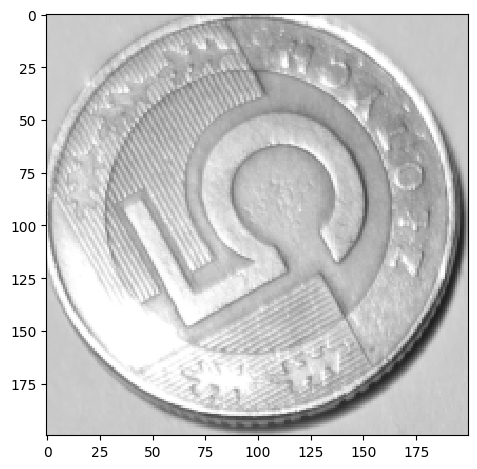

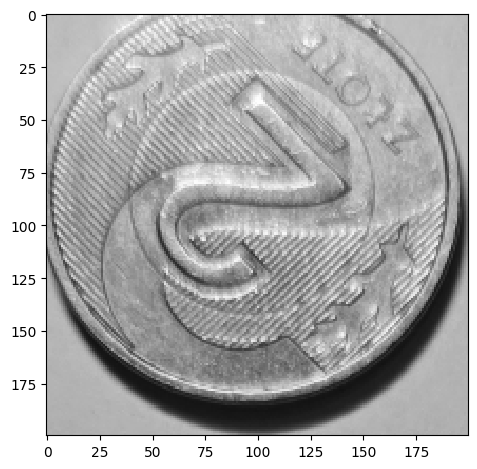

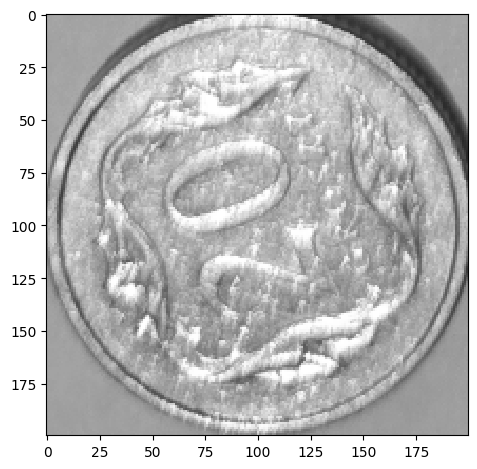

Corrupt JPEG data: 2 extraneous bytes before marker 0xd7


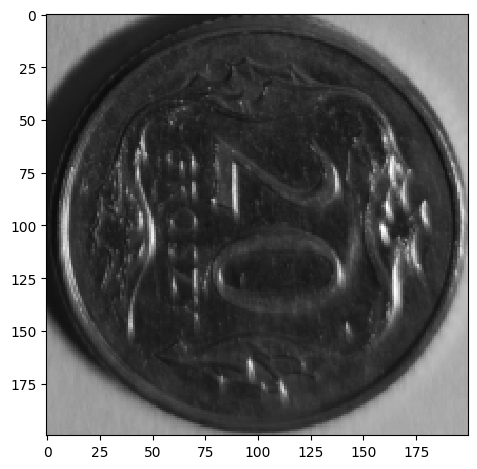

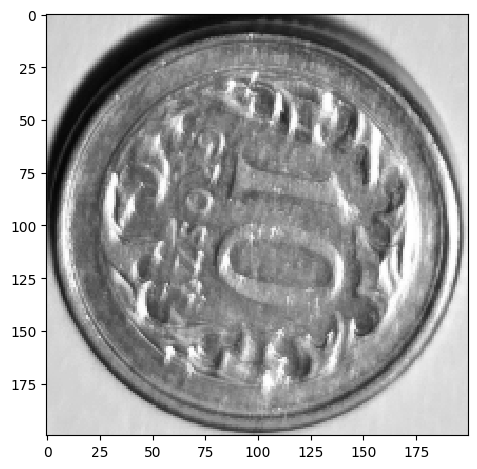

Corrupt JPEG data: 1 extraneous bytes before marker 0xd5


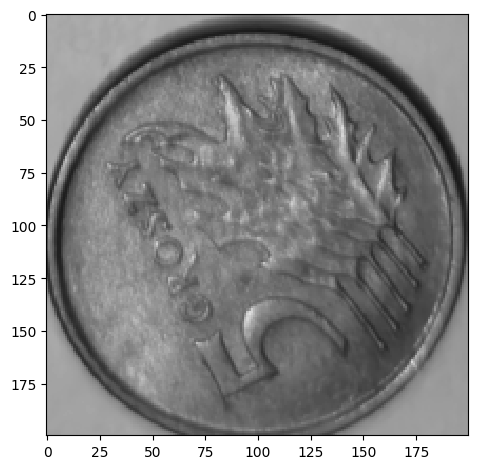

Corrupt JPEG data: 3 extraneous bytes before marker 0xd0


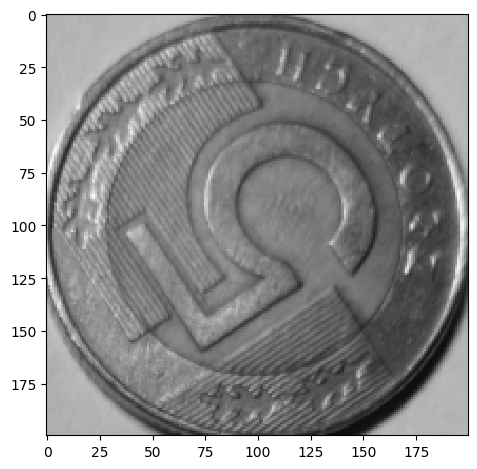

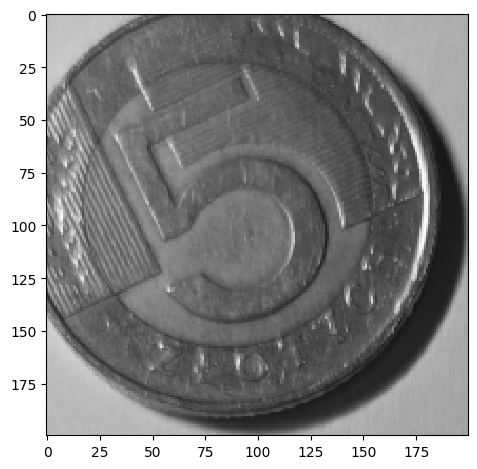

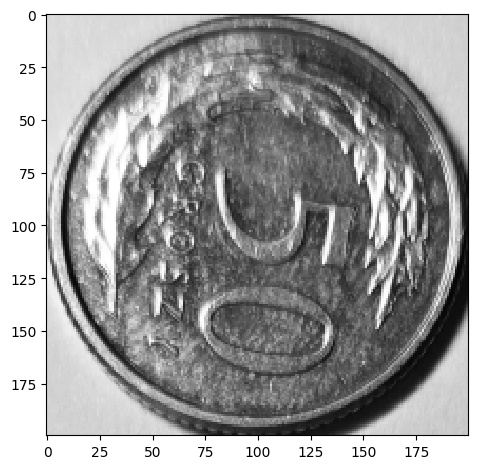

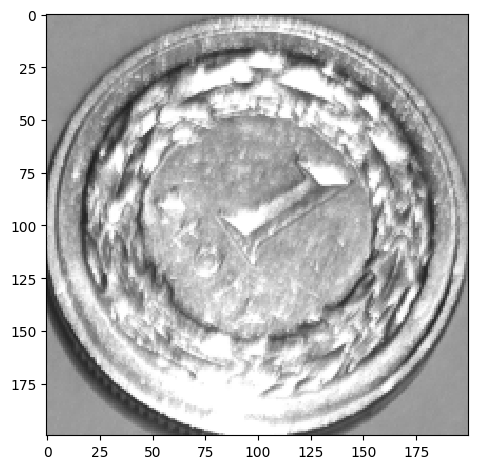

Corrupt JPEG data: 2 extraneous bytes before marker 0xd7


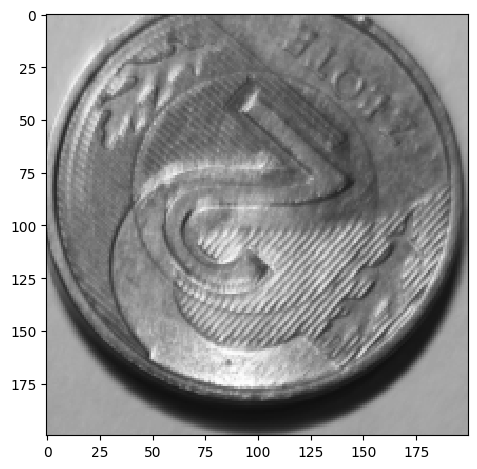

Corrupt JPEG data: 1 extraneous bytes before marker 0xd0


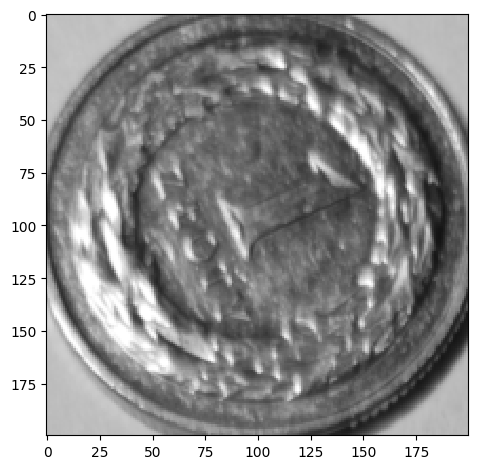

Corrupt JPEG data: 6 extraneous bytes before marker 0xd7


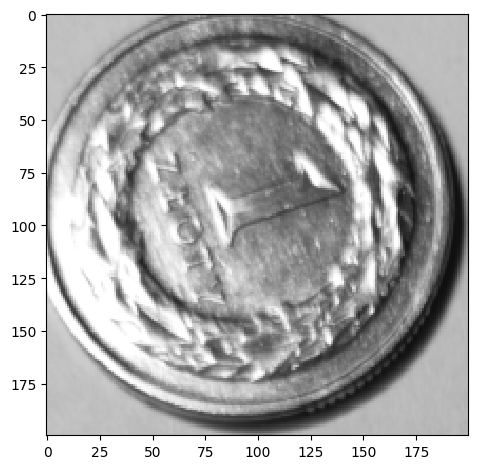

Corrupt JPEG data: 1 extraneous bytes before marker 0xd3


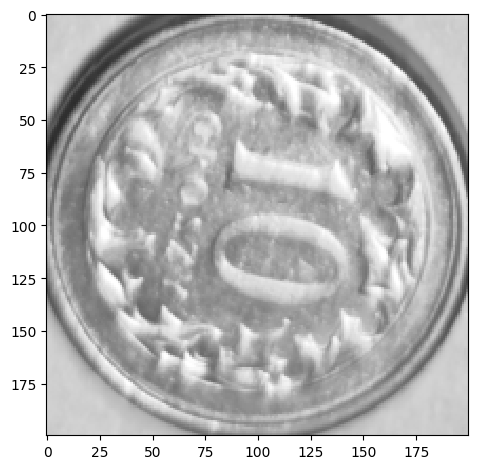

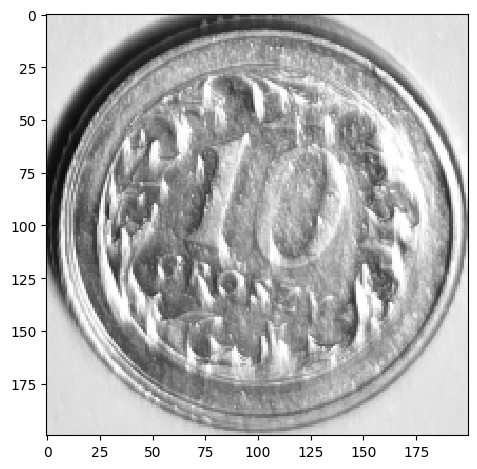

Corrupt JPEG data: 6 extraneous bytes before marker 0xd7


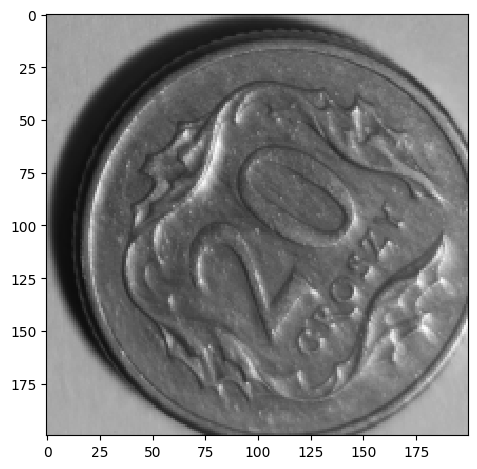

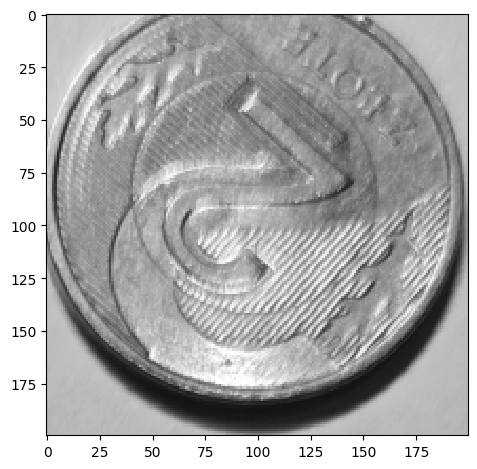

Corrupt JPEG data: 1 extraneous bytes before marker 0xd0


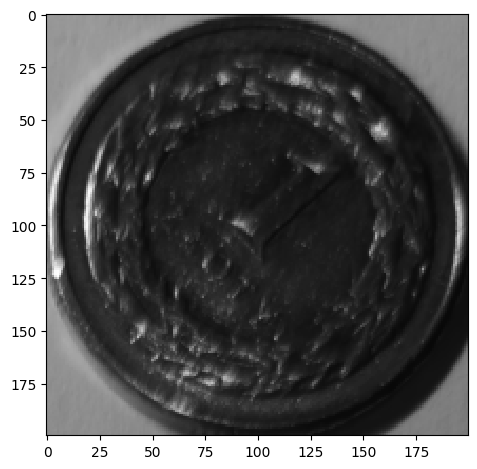

Corrupt JPEG data: 1 extraneous bytes before marker 0xd2


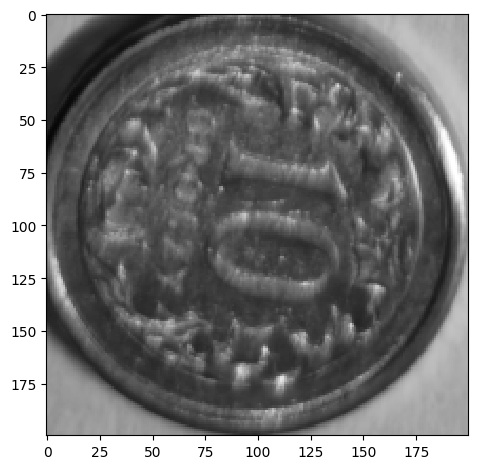

Corrupt JPEG data: 2 extraneous bytes before marker 0xd7


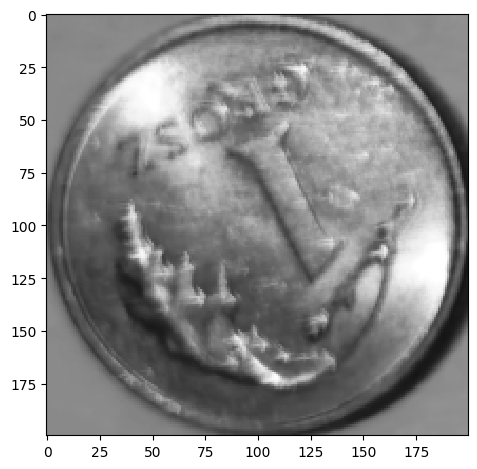

In [2]:
from aoc.utils import (
    extract_coin,
    gaussuian_mask,
    convolve_mask,
)
from tqdm import tqdm
import cv2 as cv

resize_shape = (200, 200)
mask_sigma = 15
mask = gaussuian_mask(resize_shape, mask_sigma)
orientations = 8
pixels_per_cell = (16, 16)
cells_per_block = (3, 3)

for index, row in df.iterrows():
    bounding_box = (row["x1"], row["y1"], row["x2"], row["y2"])

    image_path = os.path.join(data_dir, row["img_dir"])
    image = cv.imread(image_path)

    image = image[:, :, ::-1]

    image = extract_coin(image, bounding_box, resize_shape)
    skimage.io.imshow(image)
    plt.show()